# Scrape

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
url = "https://www.audleytravel.com/italy/best-time-to-visit"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

In [38]:
def remove_newlines(serie):
    serie = serie.replace('\n', ' ')
    serie = serie.replace('\\n', ' ')
    serie = serie.replace('\r', ' ')
    serie = serie.split()
    serie = ' '.join(serie)
    serie = serie.split("Climate Trip ideas")[1].split("Why travel with")[0].strip()
    serie = re.sub(r'Creating tailor-made.*?Request a brochure', '', serie)
    return serie

In [23]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
url = "https://www.audleytravel.com/destinations"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

destination_response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup
destination_soup = BeautifulSoup(destination_response.content, "html.parser")

In [47]:
article_divs = destination_soup.find_all("ul", class_="dest-list__links")
countries = []
# Iterate through the found <div> elements
for div in article_divs:
    anchor_tags = div.find_all("a")
    # Iterate through the <a> elements
    for anchor in anchor_tags:
        href = anchor.get("href")  # Extract href attribute
        print("Href:", href)
        countries.append(href)

Href: /usa/alaska
Href: /antarctica
Href: /antigua
Href: /the-arctic
Href: /argentina
Href: /australia
Href: /barbados
Href: /belize
Href: /bhutan
Href: /bolivia
Href: /borneo
Href: /botswana
Href: /brazil
Href: /cambodia
Href: /canada
Href: /chile
Href: /colombia
Href: /the-cook-islands
Href: /costa-rica
Href: /croatia
Href: /cyprus
Href: /dubai
Href: /ecuador
Href: /egypt
Href: /fiji
Href: /french-polynesia
Href: /the-galapagos-islands
Href: /greece
Href: /grenada
Href: /guatemala
Href: /usa/hawaii
Href: /honduras
Href: /iceland
Href: /india
Href: /indonesia
Href: /israel
Href: /italy
Href: /japan
Href: /jordan
Href: /kenya
Href: /laos
Href: /madagascar
Href: /malawi
Href: /malaysia
Href: /the-maldives
Href: /mauritius
Href: /mexico
Href: /morocco
Href: /mozambique
Href: /namibia
Href: /nepal
Href: /new-zealand
Href: /nicaragua
Href: /oman
Href: /panama
Href: /paraguay
Href: /peru
Href: /the-philippines
Href: /portugal
Href: /rwanda
Href: /saint-kitts-and-nevis
Href: /saint-lucia
Hre

In [48]:
countries = ["/thailand", "/india", "/australia"]

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
url = f"https://www.audleytravel.com{country}/best-time-to-visit"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

In [53]:
import time

for country in countries:
    url = f"https://www.audleytravel.com{country}/best-time-to-visit"

    # Save text from the url to a country.txt file
    with open('raw_data/' + country[1:] + "_best_time" + ".txt", "w", encoding="UTF-8") as f:
        
        print(country[1:])
        
        response = requests.get(url, headers=headers)
    
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # extract and clean text
        text = remove_newlines(soup.get_text())

        # write the text to the file in the text directory
        f.write(text)
        time.sleep(1)


thailand
india
australia


# QA

In [67]:
import requests
import re
import tiktoken
import pandas as pd
import os
import openai

openai.api_key = KEY

In [62]:
import os
import pandas as pd
#create a df from the stored text files

# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("raw_data/"):
    if file[-14:] == "_best_time.txt":

        # Open the file and read the text
        with open("raw_data/" + file, "r", encoding="UTF-8") as f:
            text = f.read()
    
            # append text to list.
            texts.append((file[:-4], text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# # Set the text column to be the raw text with the newlines removed
df.to_csv('processed/scraped2.csv')
df.head()

,fname,text
0,thailand_best_time,The best time to visit Thailand is during the ...
1,india_best_time,The best time to visit India is between Octobe...
2,australia_best_time,The best time to visit Australia depends on th...


<Axes: >

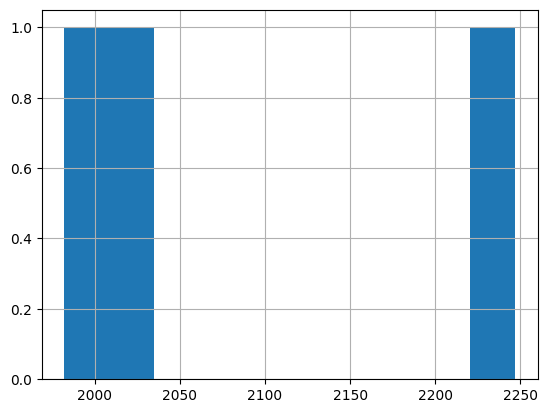

In [63]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped2.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [64]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]

    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks


shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])

    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<Axes: >

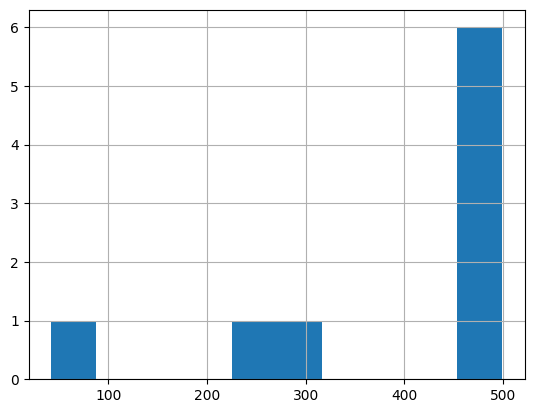

In [65]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [68]:


df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])

df.to_csv('processed/embeddings2.csv')
df.head()

,text,n_tokens,embeddings
0,The best time to visit Thailand is during the ...,499,"[-0.004337160848081112, -0.016029594466090202,..."
1,This means that you can go anywhere in the cou...,493,"[0.0004168423474766314, -0.011694074608385563,..."
2,"However, the more comfortable cooler temperatu...",300,"[0.008170594461262226, -0.029737547039985657, ..."
3,The best time to visit India is between Octobe...,487,"[0.02143171615898609, 0.002314802724868059, 0...."
4,"As daytime temperatures are very high, we'd re...",476,"[0.015371264889836311, 0.003339744871482253, 0..."


In [69]:
import numpy as np
from openai.embeddings_utils import distances_from_embeddings

df=pd.read_csv('processed/embeddings2.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,The best time to visit Thailand is during the ...,499,"[-0.004337160848081112, -0.016029594466090202,..."
1,This means that you can go anywhere in the cou...,493,"[0.0004168423474766314, -0.011694074608385563,..."
2,"However, the more comfortable cooler temperatu...",300,"[0.008170594461262226, -0.029737547039985657, ..."
3,The best time to visit India is between Octobe...,487,"[0.02143171615898609, 0.002314802724868059, 0...."
4,"As daytime temperatures are very high, we'd re...",476,"[0.015371264889836311, 0.003339744871482253, 0..."


In [70]:
def create_context(
    question, df, max_len=1800, size="ada"
    ):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():

        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4

        # If the context is too long, break
        if cur_len > max_len:
            break

        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

In [71]:
def answer_question(
    df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [80]:
answer_question(df, question="is october a good time to visit thailand?")

'Yes, October is a good time to visit Thailand. The more comfortable cooler temperatures and lower humidity, along with less chance of rain at the end of the month, make October a good month to travel.'